In [17]:
#Importing libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [18]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
df.shape

(9240, 37)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [22]:
#EXPLORATORY DATA ANALYSIS
#DATA CLEANING..

#Check for duplicates...

sum(df.duplicated(subset='Prospect ID'))==0

True

In [23]:
#No duplicate values in Prospect ID.
sum(df.duplicated(subset='Lead Number'))==0


True

In [24]:
#No duplicate in Lead number..

#Clearly Prospect ID and Lead Number are just indicative of the ID Number of the Contacted People and can be dropped these two columns.

#Dropping of 'Prospect ID' and 'Lead Number'

df.drop(['Prospect ID', 'Lead Number'], 1, inplace=True)


In [25]:
#Converting 'select' values to NaN.

df=df.replace('Select', np.nan)

In [26]:
#Checking for null values in each rows.

df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [27]:
#Checking percentage of null values in each column.

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [28]:
#Droping columns with more than 45% missing values...

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [29]:
#Checking for percentage of null values after droping columns...

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [30]:
#CATEGORICAL ATTRIBUTES ANALYSIS:

#Checking value counts of Country column...

df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

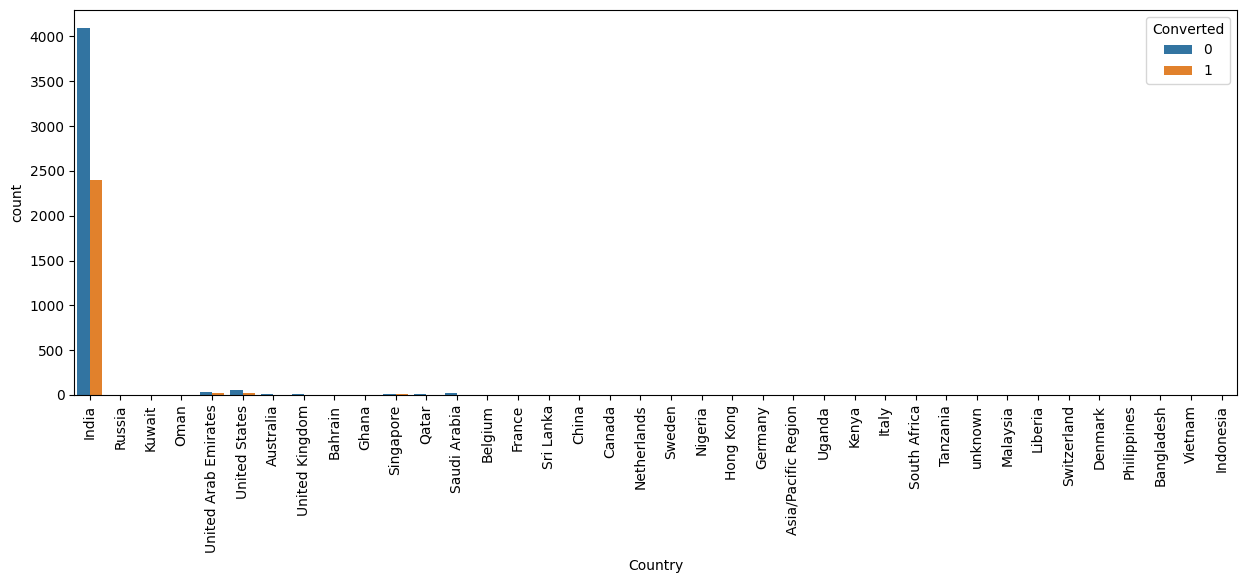

In [32]:
#plot for country column..

plt.figure(figsize=(15,5))

s1=sns.countplot(x=df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
# India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')


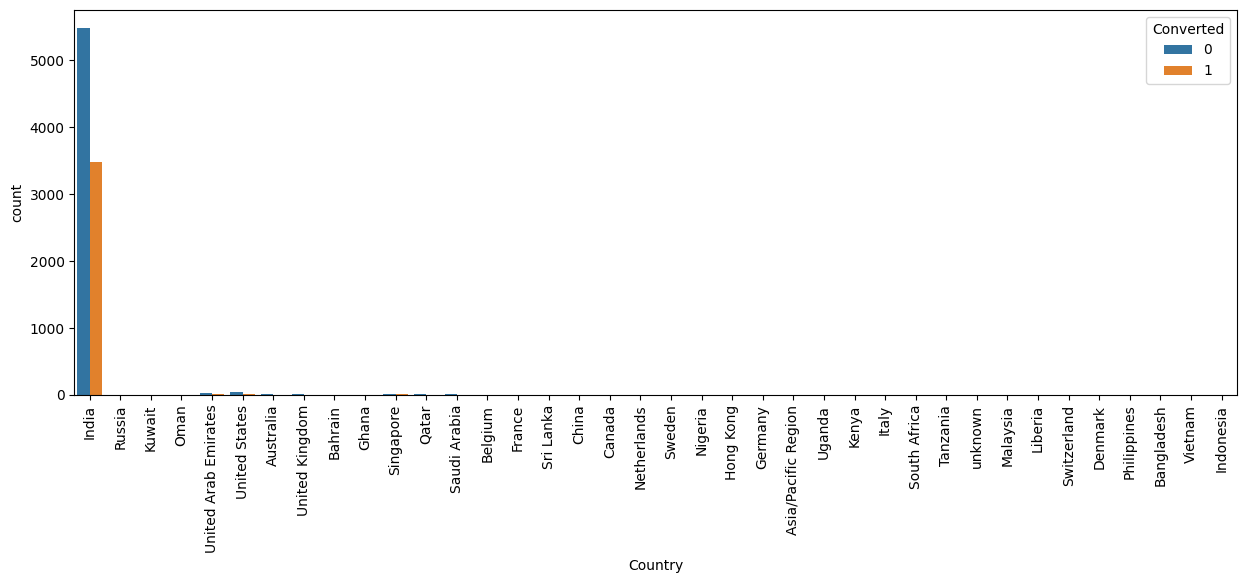

In [35]:
#plotting of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')


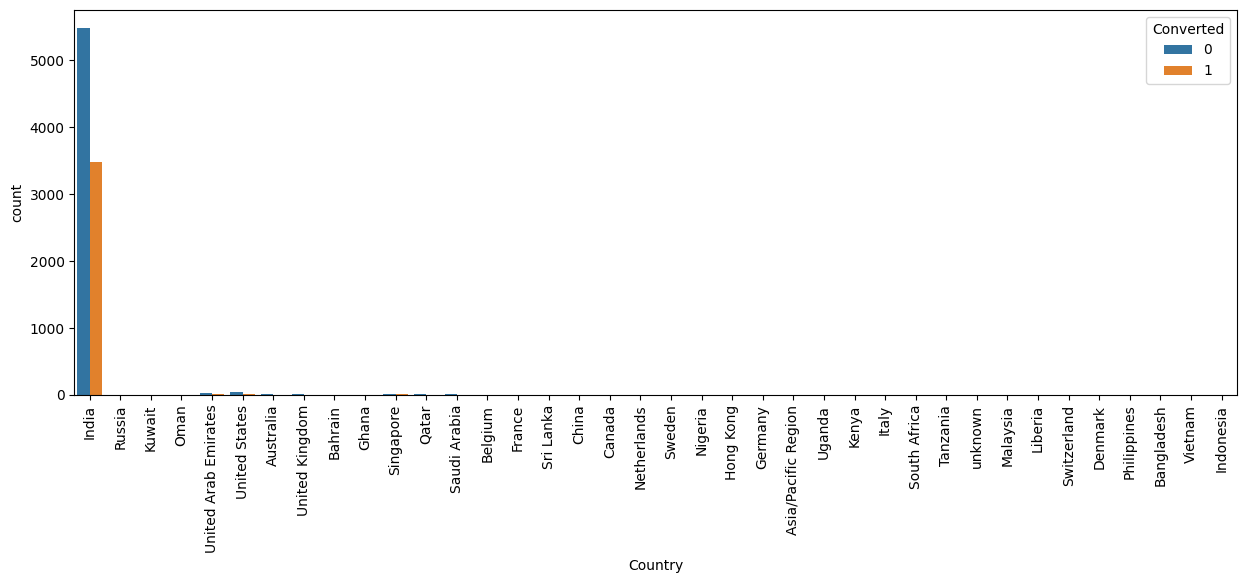

In [37]:
#plotting of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
#As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped...

#Creating a list of columns to be dropped.

cols_to_drop=['Country']


In [39]:
#Checking value counts 'City' column

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

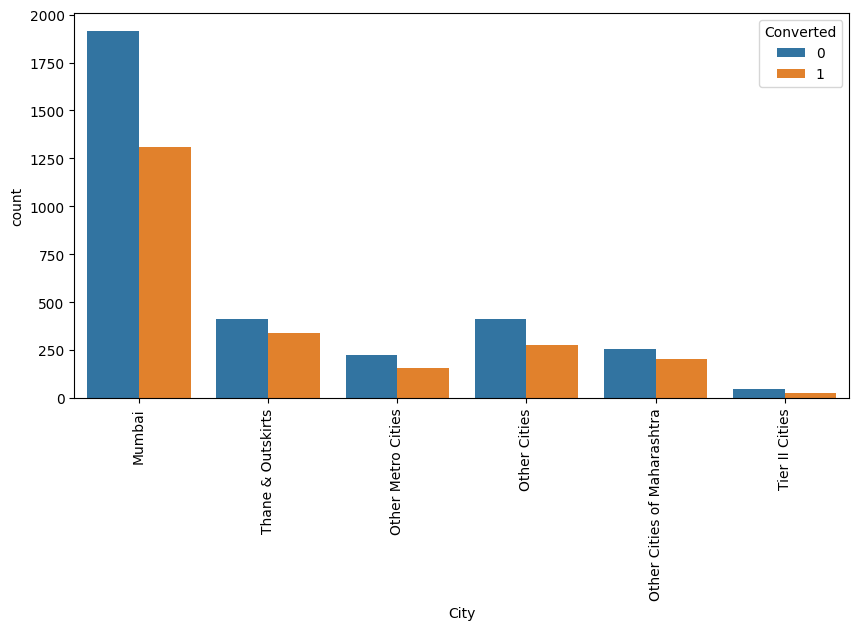

In [40]:
#Plotting of City column after replacing NaN values...

plt.figure(figsize=(10,5))
s1=sns.countplot(x=df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
#Checking value counts of Specialization column...

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [42]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'..

df=pd.read_csv('Leads.csv')
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')


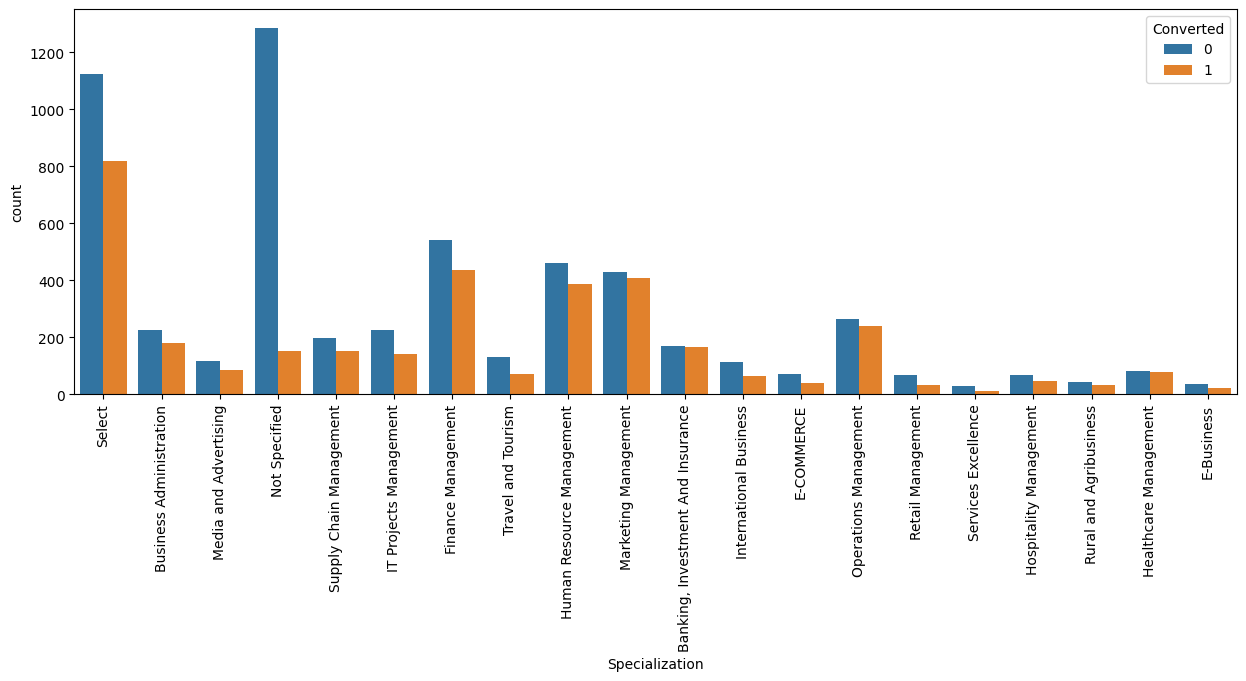

In [43]:
#plotting of specialization column...

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
#We can see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

#combining Management and Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

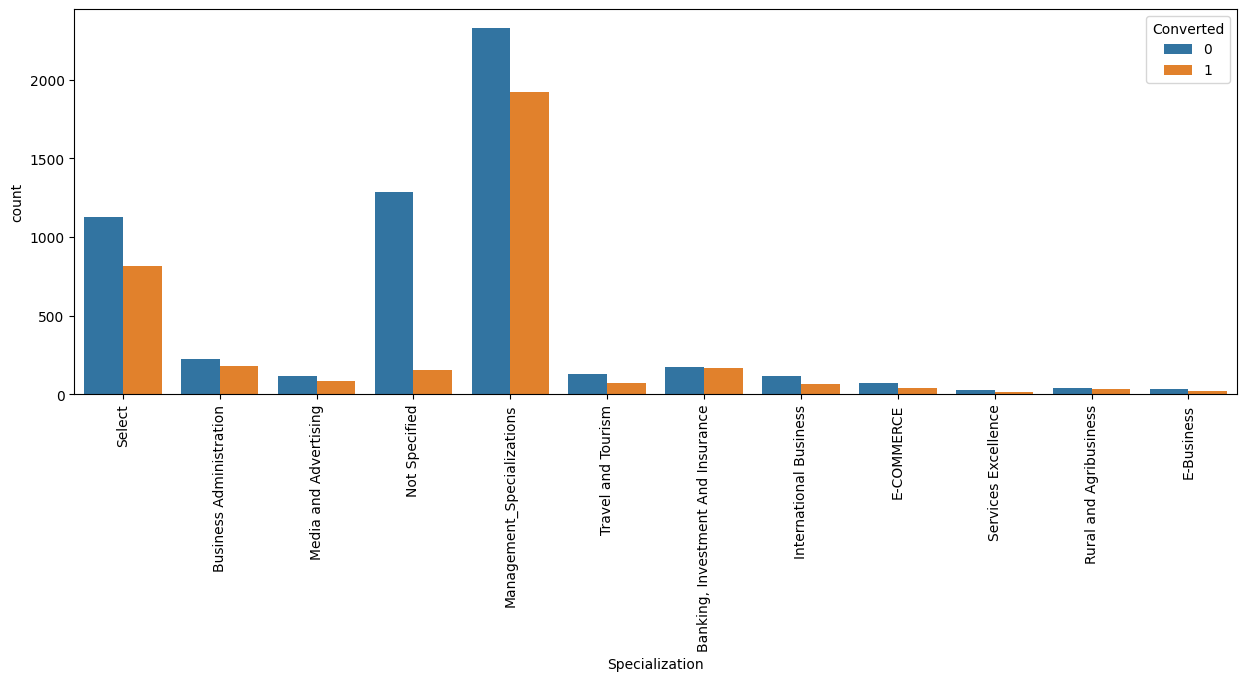

In [45]:
#Visualizing count of variables based on converted value...

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()



In [46]:
#what is your current occupation...

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
#unemployed count is high so that imput NaN values with 'Unemployed'

df['What is your current occupation']= df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [48]:
#Checking count of values...

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

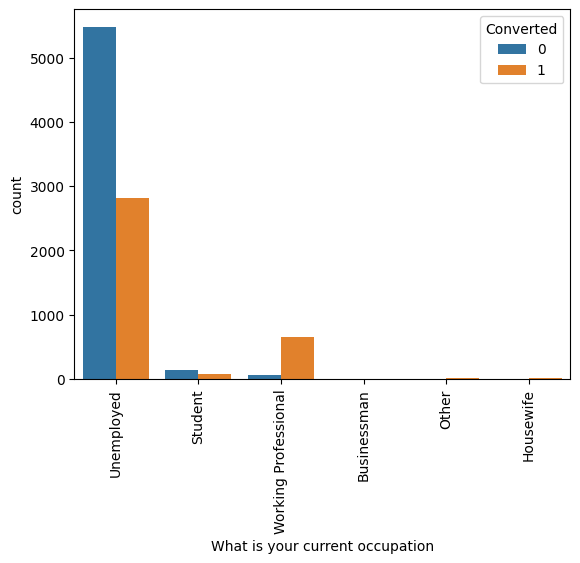

In [49]:
#Visualizing count of variable based on converted value...

s1=sns.countplot(x=df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
#Unemployed leads are the most...

#Checking value counts...
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [51]:
#Replacing NaN values with 'Better Career Prospects'..

df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

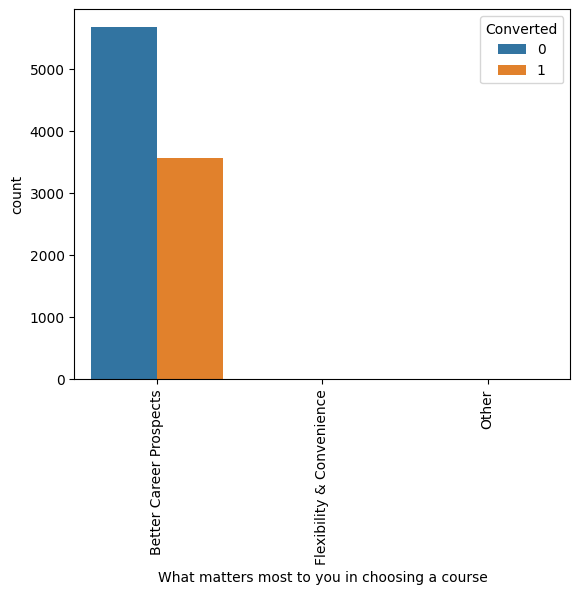

In [53]:
#Visualizing count of variable based on converted value...

s1=sns.countplot(x=df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [54]:
#Checking value counts of variable...

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [55]:
#Another column to drop...So append this column to cols_to_drop list....

cols_to_drop=['Country']

cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [56]:
#Checking value counts of Tag variable...

#df=pd.read_csv('Leads.csv')
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [57]:
#Replacing NaN values with 'Not Specified'

df['Tags']=df['Tags'].replace(np.nan,'Not Specified')

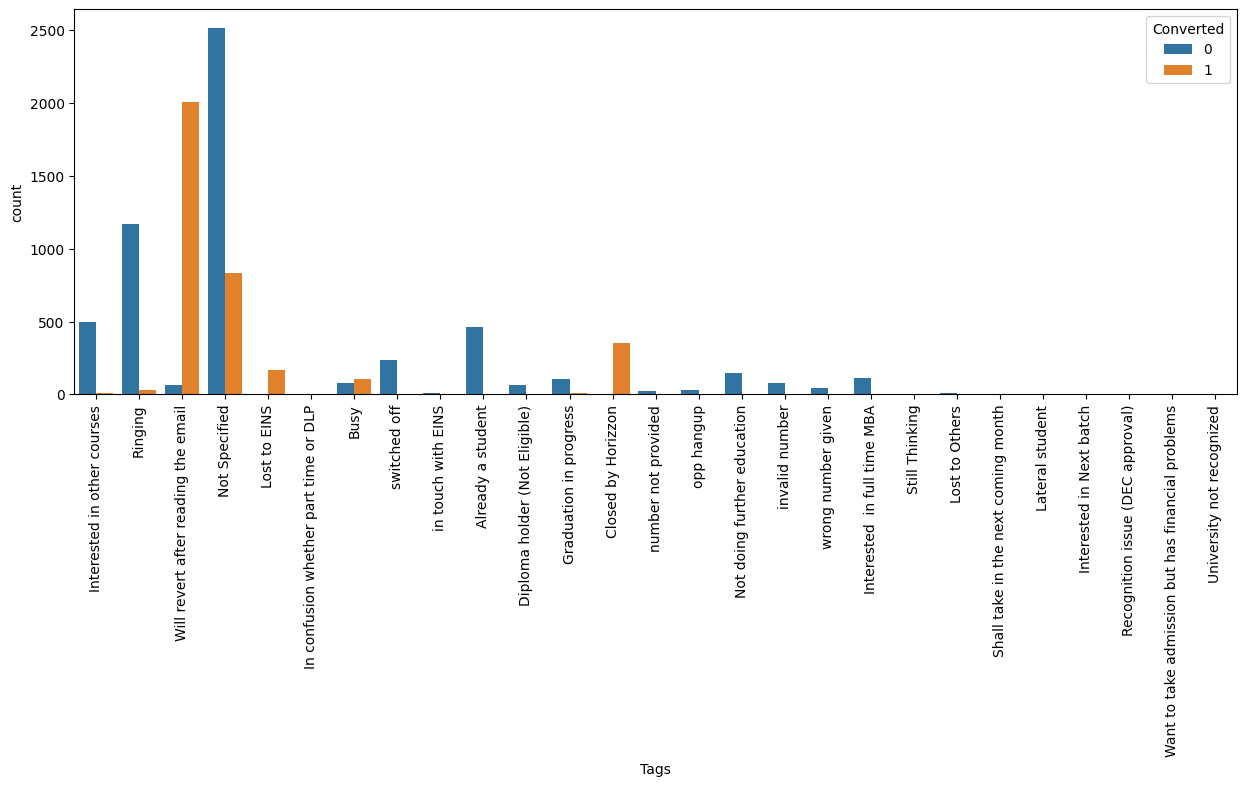

In [58]:
#Visualizing count of variable based on Converted value...

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#replacing tags with low frequency with "Other Tags"... 

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [60]:
#Checking percentage of missing values...

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [61]:
#Checking value counts of Lead Source column...

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [62]:
#Replacing Nan Values and combining low frequency values...
#We can group some of the lower frequency occuring labels under a common label 'Others'...
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                   

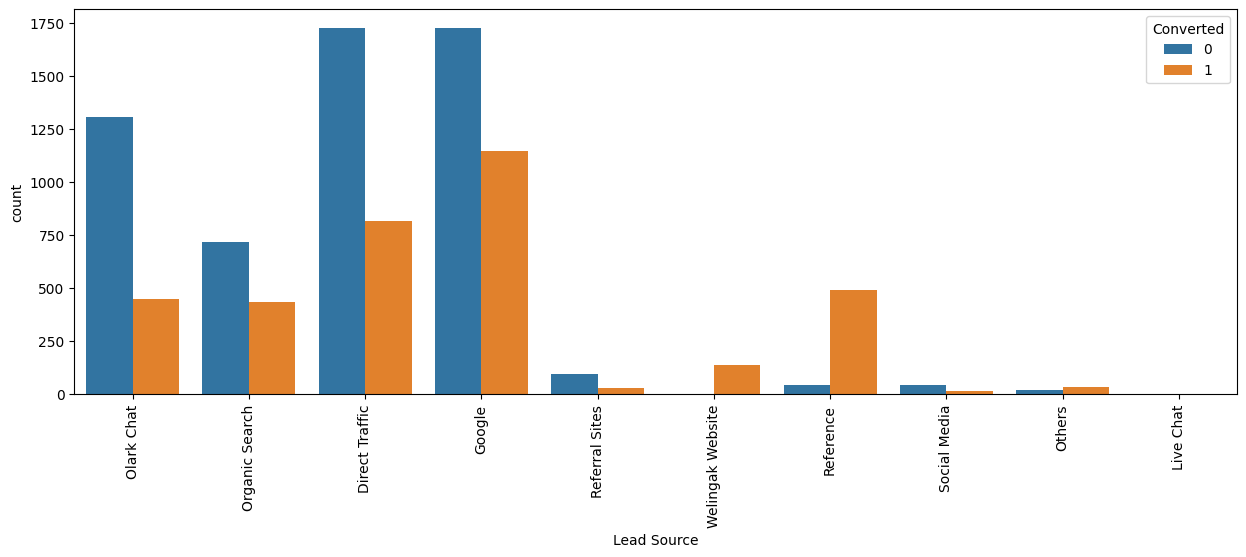

In [63]:
#Visualizing count of variable based on Converted value...

plt.figure(figsize=(15,5))
s1=sns.countplot(x=df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
#Inference

#Maximum number of leads are generated by Google and Direct traffic.
#Conversion Rate of reference leads and leads through welingak website is high.
#To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [65]:
#Checking value counts of 'Last Activity'...

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [66]:
#Replacing Nan Values and combining low frequency values...

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked','Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')   
                                             

In [67]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [68]:
#Check the Null Values in All Columns:

round(100*(df.isnull().sum()/len(df.index)), 2)
 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [69]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model...


df = df.dropna()

In [70]:
#Checking percentage of Null Values in All Columns:

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [71]:
#Checking value counts of 'Lead Origin'...
df=pd.read_csv('Leads.csv')

df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

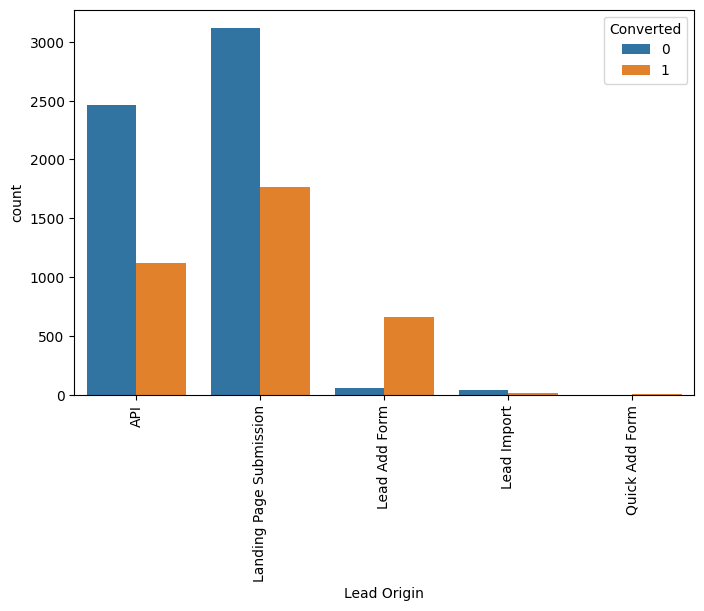

In [72]:
#Visualizing count of variable based on Converted value...

plt.figure(figsize=(8,5))
s1=sns.countplot(x=df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [73]:
#Inference

#API and Landing Page Submission bring higher number of leads as well as conversion.
#Lead Add Form has a very high conversion rate but count of leads are not very high.
#Lead Import and Quick Add Form get very few leads.
#In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


In [74]:
#Checking value counts for 'Do Not Call'...

df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [75]:
#Checking value counts for 'Do Not Email'...

df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [ ]:
#We Can append the 'Do Not Call' column to the list of columns to be Dropped since > 90% is of only one Value...

In [76]:
cols_to_drop=['Country', 'What matters most to you in choosing a course']

cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [77]:
#IMBALANCED VARIABLES THAT CAN BE DROPPED...

df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [78]:
df['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [79]:
df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [80]:
df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [81]:
df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [82]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [83]:
df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [84]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [85]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [86]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [87]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [88]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [89]:
#Adding imbalanced columns to the list of columns to be dropped...

cols_to_drop.extend(['Prospect ID','Lead Number','Do Not Call','Country','How did you hear about X Education','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','I agree to pay the amount through cheque'])


In [90]:
#Checking value counts of last Notable Activity...

df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [91]:
#Clubbing lower frequency values...

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

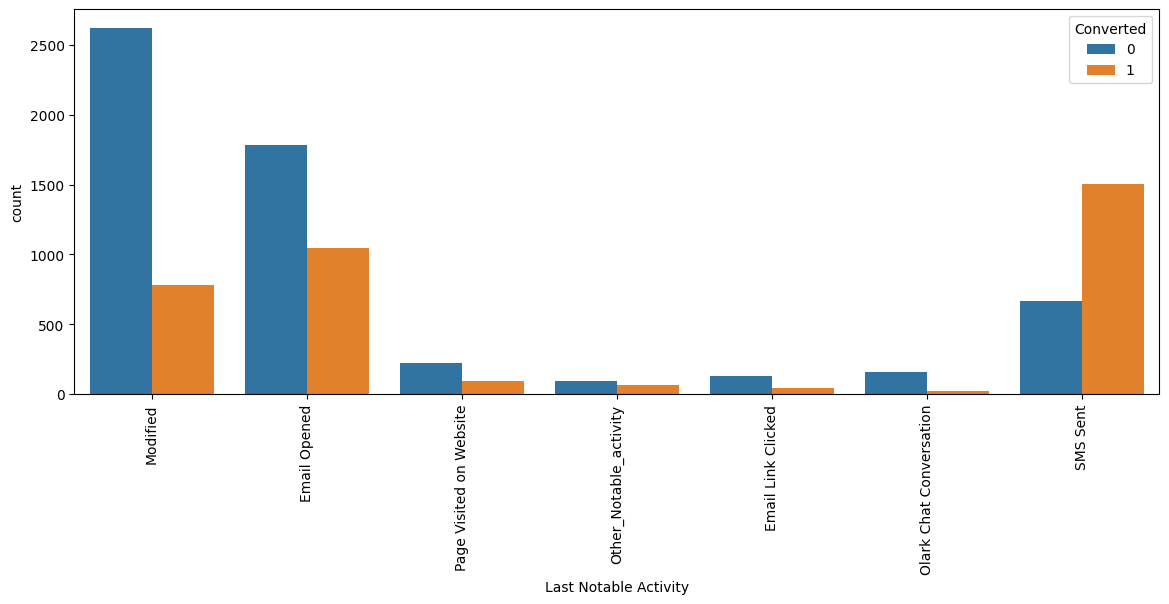

In [92]:
#Visualizing count of variable based on Converted value...

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [93]:
#Checking value counts for variable...

df['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [94]:
#List of columns to be dropped...

cols_to_drop = ['Prospect ID','Lead Number','Do Not Call','Country','How did you hear about X Education','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','I agree to pay the amount through cheque']



In [95]:
#Drop the columns...
df=pd.read_csv('Leads.csv')

df=df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          7802 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

In [96]:
#NUMERICAL DATA ANALYSIS

#Check the percentage of data that has converted value=1.

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

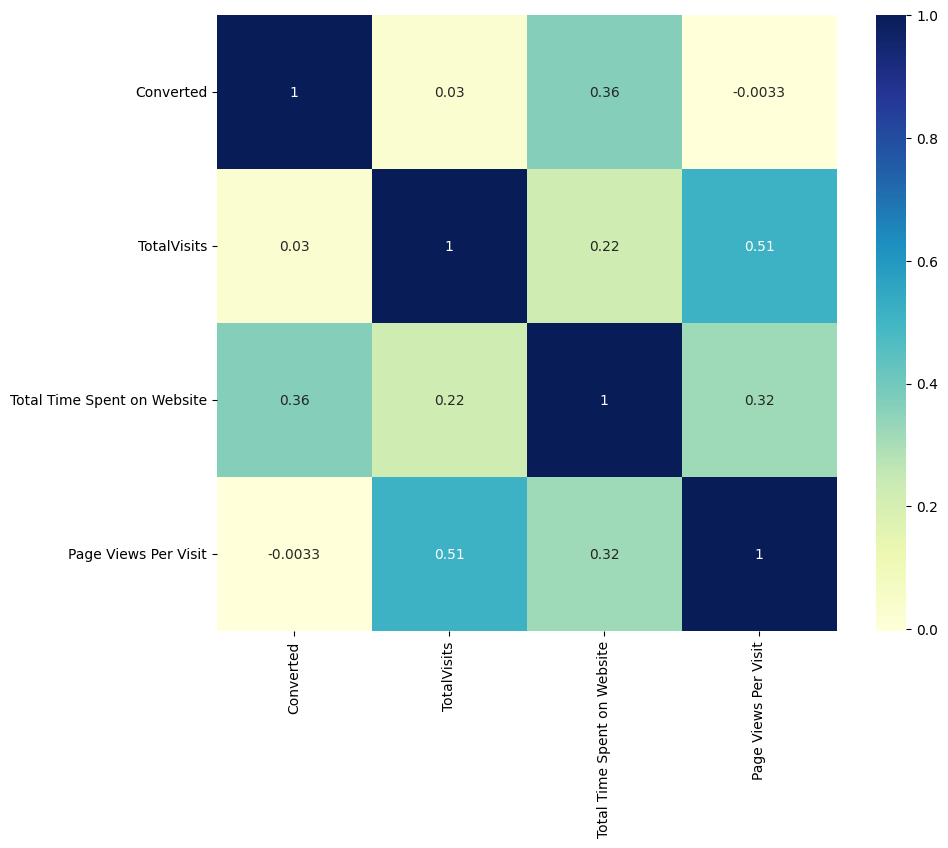

In [97]:
#Checking correlations of numeric values...

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

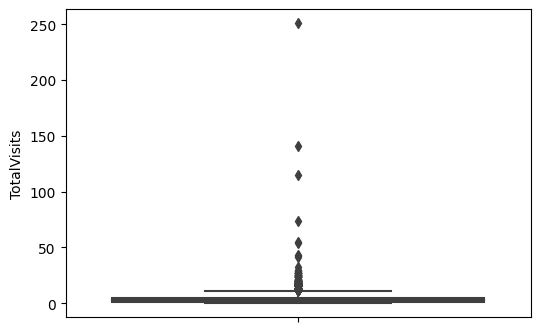

In [98]:
#Checking of Outlier in visualization of variable in Total Visits...

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [99]:
#Outlier is present...

#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

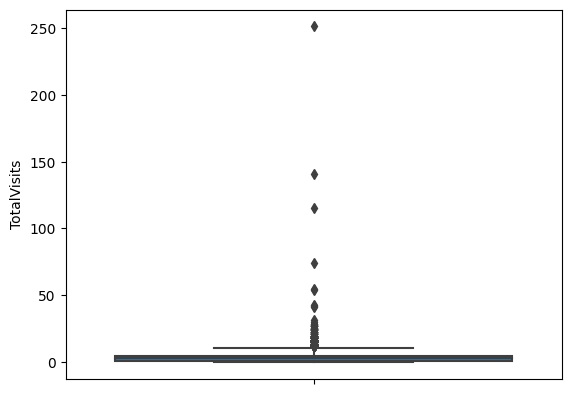

In [100]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values...

Q3 = df.TotalVisits.quantile(0.99)
leads = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
leads = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [101]:
df.shape

(9240, 14)

In [102]:
#Checking percentiles for another numerical column "Total Time Spent on Website"...

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

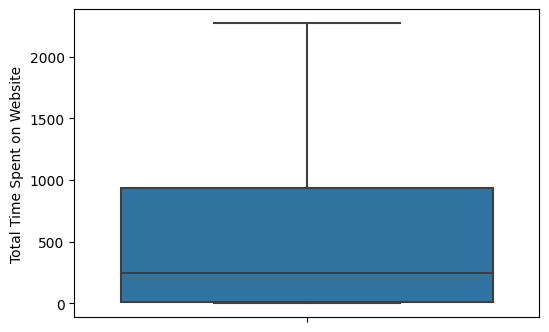

In [103]:
#visualizing spread of numeric variable 'Total Time Spent on Website'...

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

In [104]:
#Since there are no major Outliers for above variable we don't do any Outlier Treatment for this Column...


#checking spread of "Page Views Per Visit"...

df['Page Views Per Visit'].describe()


count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

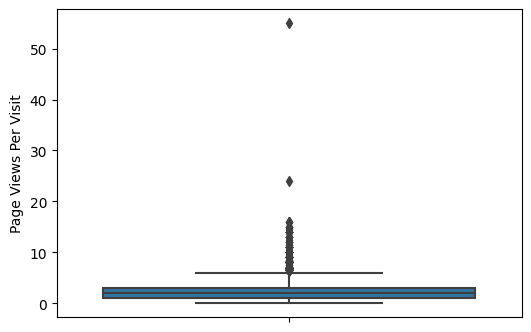

In [105]:
#visualizing spread of above numeric variable...

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()


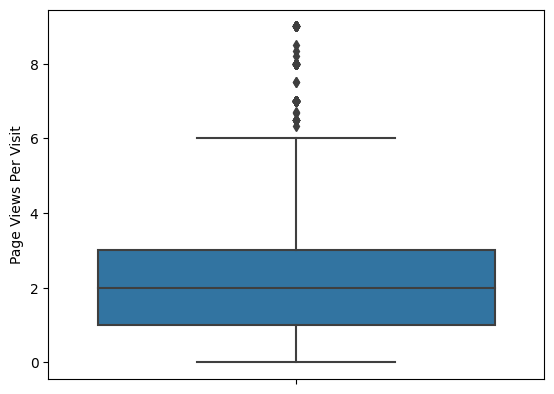

In [106]:
#Outlier Treatment: Remove top & bottom 1% ...

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [107]:
df.shape

(9028, 14)

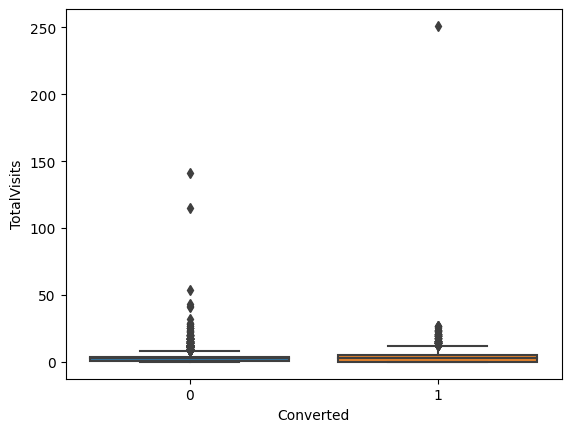

In [108]:
#Checking Spread of "Total Visits" v/s Converted variable...

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()


In [109]:
#Inference

#Median for converted and not converted leads are almost close.
#Nothing conclusive can be said on the basis of Total Visits.


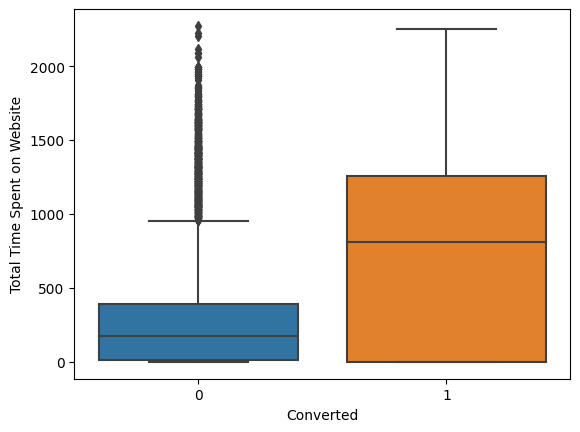

In [110]:
#Checking Spread of "Total Time Spent on Website" vs Converted variable...

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()


In [111]:
#Inference

#Leads spending more time on the website are more likely to be converted.
#Website should be made more engaging to make leads spend more time.


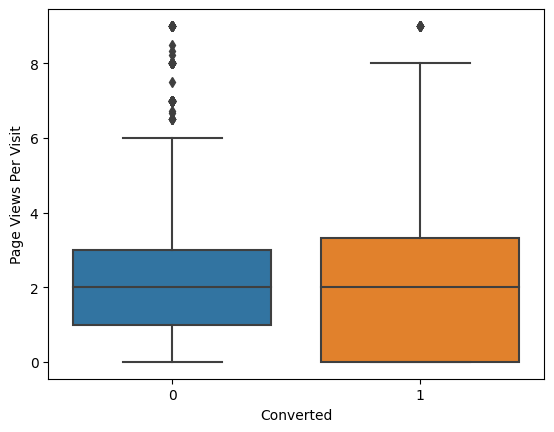

In [112]:
#checking Spread of "Page Views Per Visit" vs Converted variable...

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [113]:
#Inference

#Median for converted and unconverted leads are the same.
#Nothing can be said specifically for lead conversion from Page Views Per Visit.


In [114]:
#Checking missing values in remaining columns...

round(100*(df.isnull().sum()/len(df.index)),2)


Lead Origin                                0.00
Lead Source                                0.32
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            15.81
What is your current occupation           29.46
Tags                                      36.63
City                                      15.67
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [115]:
#There are no missing values in the columns to be analyzed further...
#So we can move to next step Dummy Variable Creation..

In [116]:
#DUMMY VARIABLE CREATION

df.shape

(9028, 14)

In [117]:
#Getting a list of categorical columns..

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [118]:
# List of variables to map..

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

df[varlist] = df[varlist].apply(binary_map)

In [119]:
#Getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df,dummy],1)
df.shape

(9028, 28)

In [120]:
dummy = pd.get_dummies(df['Specialization'], drop_first=True)



df = pd.concat([df, dummy], axis = 1)
df.shape

(9028, 46)

In [121]:
dummy = pd.get_dummies(df['Lead Source'], drop_first=True)




df = pd.concat([df, dummy], axis = 1)
df.shape

(9028, 66)

In [122]:
dummy = pd.get_dummies(df['Last Activity'], drop_first=True)



df = pd.concat([df, dummy], axis = 1)

In [123]:
dummy = pd.get_dummies(df['Last Notable Activity'], drop_first=True )


df= pd.concat([df, dummy], axis = 1)

In [124]:
dummy = pd.get_dummies(df['Tags'], drop_first=True)

df = pd.concat([df,dummy],1)
df.shape

(9028, 122)

In [125]:
#Dropping the original columns after dummy variable creation
cat_cols= df.select_dtypes(include=['object']).columns

df.drop(cat_cols,1,inplace = True)


In [126]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#TRAIN-TEST SPLIT AND LOGISTIC REGRESSION MODEL BUILDING:

In [127]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [128]:
# Splitting the data into train and test...

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6319 entries, 5736 to 5780
Columns: 113 entries, Do Not Email to wrong number given
dtypes: float64(2), int64(3), uint8(108)
memory usage: 962.7 KB


In [130]:
#Scaling...

#Scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
5736,-0.294402,1.954740,0.849325,0.522407,-0.678253,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9064,-0.294402,0.135088,1.354558,-0.492219,1.474375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7757,-0.294402,0.741639,-0.824952,0.036232,1.474375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9119,-0.294402,-0.269280,0.526639,-0.138157,1.474375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2433,-0.294402,-0.673647,-0.876582,-1.195058,-0.678253,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
#Model Building using Stats Model and RFE:
import statsmodels.api as sm

In [132]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)


In [133]:
rfe.support_ 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 22),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 6),
 ('City_Other Metro Cities', False, 24),
 ('City_Select', True, 1),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', True, 1),
 ('Business Administration', True, 1),
 ('E-Business', False, 45),
 ('E-COMMERCE', False, 20),
 ('Finance Management', False, 23),
 ('Healthcare Management

In [134]:
#List of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'City_Tier II Cities', 'Business Administration',
       'International Business', 'Retail Management',
       'Supply Chain Management', 'Travel and Tourism', 'Direct Traffic',
       'Google', 'Olark Chat', 'Organic Search', 'Reference', 'Referral Sites',
       'Welingak Website', 'Converted to Lead', 'Email Bounced',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Page Visited on Website', 'SMS Sent', 'Unsubscribed',
       'View in browser link Clicked', 'Email Bounced', 'Email Link Clicked',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       

In [135]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'E-Business', 'E-COMMERCE',
       'Finance Management', 'Healthcare Management', 'Hospitality Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Rural and Agribusiness', 'Select',
       'Services Excellence', 'Facebook', 'Live Chat', 'NC_EDM',
       'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing',
       'blog', 'google', 'testone', 'welearnblog_Home', 'youtubechannel',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website', 'Resubscribed to emails',
       'Unreachable', 'Visited Booth in Tradeshow', 'Email Marked Spam',

In [136]:
#BUILDING MODEL 1
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 25 Feb 2023   Deviance:                       48078.
Time:                        16:59:50   Pearson chi2:                 2.35e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -8.595e+14   1.62e+07   -5.3e+07      0.000    -8.6e+14    -8.6e+14
Do Not Email                                         -1.824e+13   1.22e+06   -1.5e+07      0.000   -1.82e+13   -1.82e+13
Total Time Spent on Website                           8.588e+13   1.03e+06   8.32e+07      0.000    8.59e+13    8.59e+13
Lead Origin_Landing Page Submission                  -1.196e+14   2.95e+06  -4.05e+07      0.000    -1.2e+14    -1.2e+14
Lead Origin_Lead Add Form                             2.571e+14   1.91e+07   1.34e+07      0.000    2.57e+14    2.57e+14
Lead Origin_Lead Import                              -2.055e+14   2.13e+07  -9.65e+06      0.000   -2.06e+14   -2.06e+14
What is your current occupation_Housewife             5.246e+15   2.56e+07   2.05e+08      0.000    5.25e+15    5.25e+15
What is your current occupation_Other                -1.532e+14   1.98e+07  -7.76e+06      0.000   -1.53e+14   -1.53e+14
What is your current occupation_Unemployed           -4.035e+14   2.86e+06  -1.41e+08      0.000   -4.04e+14   -4.04e+14
What is your current occupation_Working Professional -3.775e+14   4.58e+06  -8.23e+07      0.000   -3.77e+14   -3.77e+14
City_Select                                          -6.845e+13   2.89e+06  -2.36e+07      0.000   -6.85e+13   -6.85e+13
City_Tier II Cities                                   1.942e+14   9.43e+06   2.06e+07      0.000    1.94e+14    1.94e+14
Business Administration                               6.697e+13   4.34e+06   1.54e+07      0.000     6.7e+13     6.7e+13
International Business                               -1.789e+14   6.23e+06  -2.87e+07      0.000   -1.79e+14   -1.79e+14
Retail Management                                    -2.068e+14   7.77e+06  -2.66e+07      0.000   -2.07e+14   -2.07e+14
Supply Chain Management                              -4.225e+13   4.54e+06   -9.3e+06      0.000   -4.22e+13   -4.22e+13
Travel and Tourism                                   -1.296e+14   5.78e+06  -2.24e+07      0.000    -1.3e+14    -1.3e+14
Direct Traffic                                       -3.734e+13   1.61e+07  -2.32e+06      0.000   -3.73e+13   -3.73e+13
Google                                                1.189e+14   1.61e+07   7.39e+06      0.000    1.19e+14    1.19e+14
Olark Chat                                            3.735e+14   1.62e+07    2.3e+07      0.000    3.73e+14    3.73e+14
Organic Search                                        9.838e+13   1.62e+07   6.07e+06      0.000    9.84e+13    9.84e+13
Reference                                             -3.39e+14   1.33e+07  -2.55e+07      0.000   -3.39e+14   -3.39e+14
Referral Sites                                        4.59

In [ ]:
#p-value of variable Lead Source_Referral Sites is high, so we can drop it.

#Dropping column with high p-value

#col = col.drop('Lead Source_Referal Sites', 1)


In [137]:
#BUILDING MODEL 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6260
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 25 Feb 2023   Deviance:                       48078.
Time:                        17:00:01   Pearson chi2:                 2.35e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -8.595e+14   1.62e+07   -5.3e+07      0.000    -8.6e+14    -8.6e+14
Do Not Email                                         -1.824e+13   1.22e+06   -1.5e+07      0.000   -1.82e+13   -1.82e+13
Total Time Spent on Website                           8.588e+13   1.03e+06   8.32e+07      0.000    8.59e+13    8.59e+13
Lead Origin_Landing Page Submission                  -1.196e+14   2.95e+06  -4.05e+07      0.000    -1.2e+14    -1.2e+14
Lead Origin_Lead Add Form                             2.571e+14   1.91e+07   1.34e+07      0.000    2.57e+14    2.57e+14
Lead Origin_Lead Import                              -2.055e+14   2.13e+07  -9.65e+06      0.000   -2.06e+14   -2.06e+14
What is your current occupation_Housewife             5.246e+15   2.56e+07   2.05e+08      0.000    5.25e+15    5.25e+15
What is your current occupation_Other                -1.532e+14   1.98e+07  -7.76e+06      0.000   -1.53e+14   -1.53e+14
What is your current occupation_Unemployed           -4.035e+14   2.86e+06  -1.41e+08      0.000   -4.04e+14   -4.04e+14
What is your current occupation_Working Professional -3.775e+14   4.58e+06  -8.23e+07      0.000   -3.77e+14   -3.77e+14
City_Select                                          -6.845e+13   2.89e+06  -2.36e+07      0.000   -6.85e+13   -6.85e+13
City_Tier II Cities                                   1.942e+14   9.43e+06   2.06e+07      0.000    1.94e+14    1.94e+14
Business Administration                               6.697e+13   4.34e+06   1.54e+07      0.000     6.7e+13     6.7e+13
International Business                               -1.789e+14   6.23e+06  -2.87e+07      0.000   -1.79e+14   -1.79e+14
Retail Management                                    -2.068e+14   7.77e+06  -2.66e+07      0.000   -2.07e+14   -2.07e+14
Supply Chain Management                              -4.225e+13   4.54e+06   -9.3e+06      0.000   -4.22e+13   -4.22e+13
Travel and Tourism                                   -1.296e+14   5.78e+06  -2.24e+07      0.000    -1.3e+14    -1.3e+14
Direct Traffic                                       -3.734e+13   1.61e+07  -2.32e+06      0.000   -3.73e+13   -3.73e+13
Google                                                1.189e+14   1.61e+07   7.39e+06      0.000    1.19e+14    1.19e+14
Olark Chat                                            3.735e+14   1.62e+07    2.3e+07      0.000    3.73e+14    3.73e+14
Organic Search                                        9.838e+13   1.62e+07   6.07e+06      0.000    9.84e+13    9.84e+13
Reference                                             -3.39e+14   1.33e+07  -2.55e+07      0.000   -3.39e+14   -3.39e+14
Referral Sites                                        4.59

In [139]:
#All p values are less...
#Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [140]:
#Create a dataframe that will contain the names of all the feature variables and  their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
34,Unsubscribed,inf
43,Had a Phone Conversation,inf
35,Unsubscribed,inf
33,SMS Sent,inf
32,SMS Sent,inf
...,...,...
36,View in browser link Clicked,1.01
62,Still Thinking,1.01
58,Lost to Others,1.01
54,In confusion whether part time or DLP,1.01


In [142]:
#There is a high correlation between two variables so we drop the variable with the higher valued VIF value


#dropping variable with high VIF

col = col.drop('View in browser link Clicked', 1)

In [143]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6319
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 25 Feb 2023   Deviance:                       69747.
Time:                        17:34:45   Pearson chi2:                 3.41e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -6.289e+14   3.78e+06  -1.66e+08      0.000   -6.29e+14   -6.29e+14
Do Not Email                                         -2.783e+13   1.22e+06  -2.29e+07      0.000   -2.78e+13   -2.78e+13
Total Time Spent on Website                            2.61e+14   1.03e+06   2.53e+08      0.000    2.61e+14    2.61e+14
Lead Origin_Landing Page Submission                  -1.448e+13   2.95e+06  -4.91e+06      0.000   -1.45e+13   -1.45e+13
Lead Origin_Lead Add Form                             9.111e+14    1.3e+07      7e+07      0.000    9.11e+14    9.11e+14
Lead Origin_Lead Import                               8.901e+13   1.45e+07   6.14e+06      0.000     8.9e+13     8.9e+13
What is your current occupation_Housewife             6.521e+14   2.56e+07   2.54e+07      0.000    6.52e+14    6.52e+14
What is your current occupation_Other                -1.275e+15   1.98e+07  -6.46e+07      0.000   -1.28e+15   -1.28e+15
What is your current occupation_Unemployed           -1.125e+15   2.86e+06  -3.94e+08      0.000   -1.13e+15   -1.13e+15
What is your current occupation_Working Professional -1.175e+15   4.58e+06  -2.57e+08      0.000   -1.18e+15   -1.18e+15
City_Select                                            1.68e+14   2.89e+06    5.8e+07      0.000    1.68e+14    1.68e+14
City_Tier II Cities                                   1.617e+14   9.43e+06   1.71e+07      0.000    1.62e+14    1.62e+14
Business Administration                               1.813e+14   4.34e+06   4.18e+07      0.000    1.81e+14    1.81e+14
International Business                               -1.231e+14   6.23e+06  -1.98e+07      0.000   -1.23e+14   -1.23e+14
Retail Management                                    -1.849e+14   7.77e+06  -2.38e+07      0.000   -1.85e+14   -1.85e+14
Supply Chain Management                              -9.363e+13   4.54e+06  -2.06e+07      0.000   -9.36e+13   -9.36e+13
Travel and Tourism                                    -9.29e+13   5.77e+06  -1.61e+07      0.000   -9.29e+13   -9.29e+13
Direct Traffic                                        2.993e+14   2.98e+06      1e+08      0.000    2.99e+14    2.99e+14
Google                                                4.107e+14    3.1e+06   1.32e+08      0.000    4.11e+14    4.11e+14
Olark Chat                                            4.367e+14   4.04e+06   1.08e+08      0.000    4.37e+14    4.37e+14
Organic Search                                        3.672e+14   3.68e+06   9.97e+07      0.000    3.67e+14    3.67e+14
Reference                                            -4.332e+11   1.32e+07  -3.28e+04      0.000   -4.33e+11   -4.33e+11
Referral Sites                                        3.01

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,SMS Sent,inf
41,Had a Phone Conversation,inf
35,Unsubscribed,inf
34,Unsubscribed,inf
32,SMS Sent,inf
...,...,...
13,Retail Management,1.03
5,What is your current occupation_Housewife,1.02
56,Lost to Others,1.01
60,Still Thinking,1.01


In [145]:
###So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:
    

In [146]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5736    0.0
9064    1.0
7757    0.0
9119    0.0
2433    0.0
1832    0.0
1157    1.0
265     0.0
1526    0.0
2037    0.0
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

In [148]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.0,5736
1,1,1.0,9064
2,0,0.0,7757
3,0,0.0,9119
4,0,0.0,2433


In [149]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.0,5736,0
1,1,1.0,9064,1
2,0,0.0,7757,0
3,0,0.0,9119,0
4,0,0.0,2433,0


In [150]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3667  262]
 [ 496 1894]]


In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8800443108086723


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.792468619246862

In [154]:
#Let us calculate specificity
TN / float(TN+FP)

0.9333163654874014

In [155]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.06668363451259862


In [156]:
#Positive predictive value 
print (TP / float(TP+FP))


0.87847866419295


In [157]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8808551525342301


In [158]:
#PLOTTING ROC CURVE

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


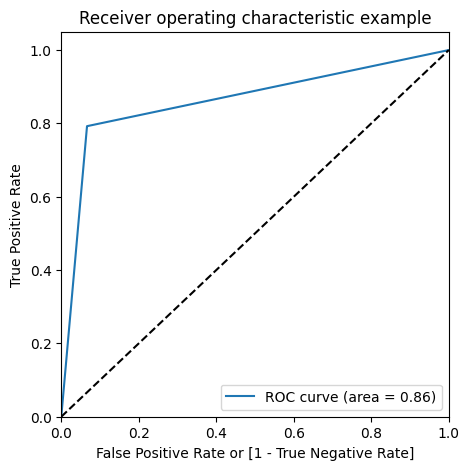

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [161]:
###The ROC Curve should be a value close to 1. We are getting a good value of 0.91 indicating a good predictive model.

#Finding Optimal Cutoff Point...
#Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:


# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,5736,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,9064,1,1,1,1,1,1,1,1,1,1,1
2,0,0.0,7757,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,9119,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,2433,0,0,0,0,0,0,0,0,0,0,0


In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.880044  0.792469  0.933316
0.1   0.1  0.880044  0.792469  0.933316
0.2   0.2  0.880044  0.792469  0.933316
0.3   0.3  0.880044  0.792469  0.933316
0.4   0.4  0.880044  0.792469  0.933316
0.5   0.5  0.880044  0.792469  0.933316
0.6   0.6  0.880044  0.792469  0.933316
0.7   0.7  0.880044  0.792469  0.933316
0.8   0.8  0.880044  0.792469  0.933316
0.9   0.9  0.880044  0.792469  0.933316


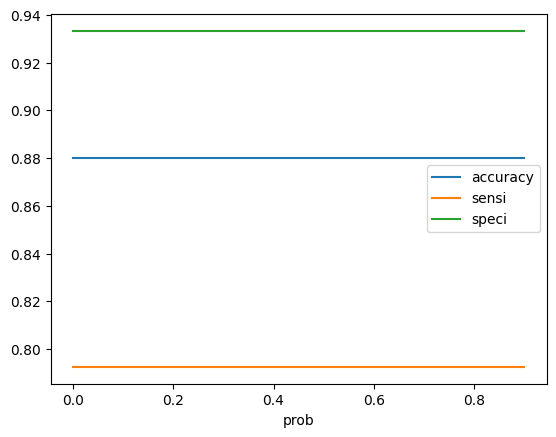

In [163]:
#Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [164]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.0,5736,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,9064,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.0,7757,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,9119,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,2433,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.0,5736,0,0
1,1,1.0,9064,1,100
2,0,0.0,7757,0,0
3,0,0.0,9119,0,0
4,0,0.0,2433,0,0


In [166]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8800443108086723

In [167]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3667,  262],
       [ 496, 1894]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.792468619246862

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.9333163654874014

In [171]:
#Observation:
#So as we can see above the model seems to be performing well. The ROC curve has a value of 0.91, which is very good. We have the following values for the Train Data:

#Accuracy : 92.16%

#Sensitivity : 82.34%

#Specificity : 98.14% 


In [172]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))


0.06668363451259862


In [173]:
#Positive predictive value 
print (TP / float(TP+FP))

0.87847866419295


In [174]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8808551525342301


In [175]:
#Looking at the confusion matrix again...
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion


array([[3667,  262],
       [ 496, 1894]], dtype=int64)

In [176]:
### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.87847866419295

In [177]:
### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.792468619246862

In [178]:
from sklearn.metrics import precision_score, recall_score

In [179]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.87847866419295

In [180]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.792468619246862

In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

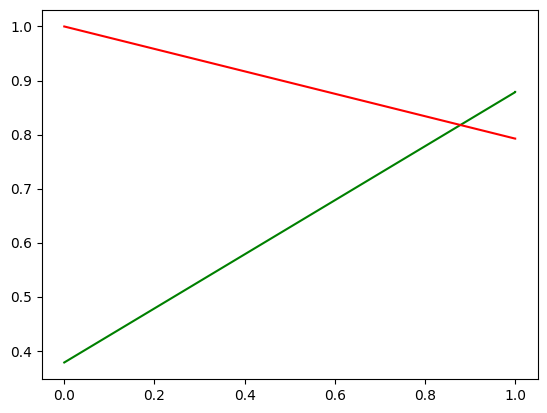

In [183]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [184]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
4696,-0.288386,-0.101444,-0.056950,0.356464,-0.677931,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5424,-0.288386,0.145466,0.357903,0.879687,-0.677931,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1629,-0.288386,-0.842173,-0.888477,-1.213205,-0.677931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2148,-0.288386,-0.842173,-0.888477,-1.213205,-0.677931,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9182,-0.288386,-0.842173,-0.888477,-1.213205,-0.677931,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [185]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Select,...,Not doing further education,Recognition issue (DEC approval),Ringing,Still Thinking,Will revert after reading the email,invalid number,number not provided,opp hangup,switched off,wrong number given
4696,-0.288386,-0.056950,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5424,-0.288386,0.357903,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1629,-0.288386,-0.888477,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2148,-0.288386,-0.888477,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9182,-0.288386,-0.888477,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [186]:
X_test_sm = sm.add_constant(X_test)

In [187]:
#PREDICTIONS ON TEST SET

In [188]:
y_test_pred = res.predict(X_test_sm)

In [189]:
y_test_pred[:10]

4696    0.0
5424    0.0
1629    0.0
2148    0.0
9182    0.0
1081    0.0
554     1.0
459     1.0
3764    0.0
4285    0.0
dtype: float64

In [190]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [191]:
#Let's see the head

y_pred_1.head()

,0
4696,0.0
5424,0.0
1629,0.0
2148,0.0
9182,0.0


In [192]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [193]:
#Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [194]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [195]:
#Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4696,0.0
1,0,5424,0.0
2,0,1629,0.0
3,0,2148,0.0
4,0,9182,0.0


In [197]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [198]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4696,0.0
1,0,5424,0.0
2,0,1629,0.0
3,0,2148,0.0
4,0,9182,0.0


In [199]:
#Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [200]:
#Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4696,0,0.0,0
1,5424,0,0.0,0
2,1629,0,0.0,0
3,2148,0,0.0,0
4,9182,0,0.0,0


In [201]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [202]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4696,0,0.0,0,0
1,5424,0,0.0,0,0
2,1629,0,0.0,0,0
3,2148,0,0.0,0,0
4,9182,0,0.0,0,0


In [203]:
#Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.8763381321520857

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1558,  113],
       [ 222,  816]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7861271676300579

In [207]:
#Let us calculate specificity
TN / float(TN+FP)


0.9323758228605625

In [208]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8783638320775027

In [209]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7861271676300579

In [210]:
#Final Observation:

#Let us compare the values obtained for Train & Test:


In [211]:

#Train Data: 

#Accuracy : 92.16%

#Sensitivity : 82.34%

#Specificity : 98.14





In [212]:
#Test Data: 
    
#Accuracy : 91.47%

#Sensitivity : 81.50%

#Specificity : 97.66%